# Mail Classifier Project (NLP) :-
## Spam vs Ham :

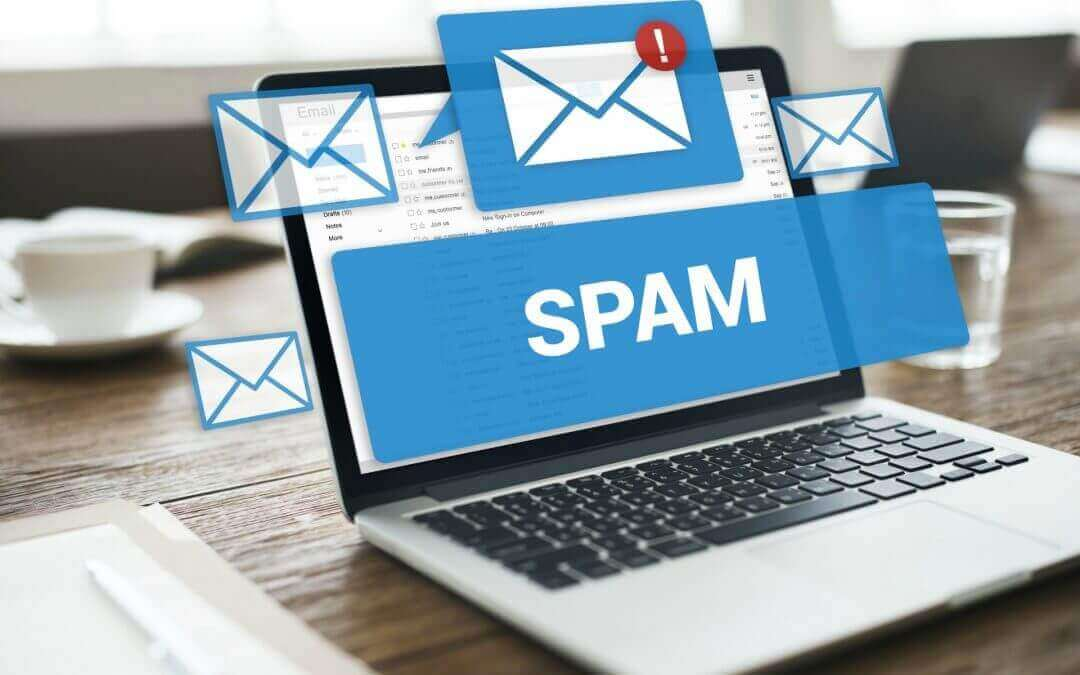

In [1]:
from IPython import display
display.Image("C:\\Users\\admin\\Desktop\\Pic\\spam-folder-1080x675.jpg")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import sklearn
from bs4 import BeautifulSoup
import time
import string
import warnings
warnings.filterwarnings('ignore')
import scipy
import re
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
df1 = pd.read_csv('/content/spam.csv', encoding='latin1')
df1

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df1.shape

(5572, 5)

In [4]:
df=df1.iloc[:,0:2]
df.rename(columns={'v1':'category','v2':'mails'},inplace=True)
df

,category,mails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.shape

(5572, 2)

In [6]:
df.isnull().sum()

category    0
mails       0
dtype: int64

In [7]:
df['category'].value_counts()

ham     4825
spam     747
Name: category, dtype: int64

<Axes: xlabel='category', ylabel='count'>

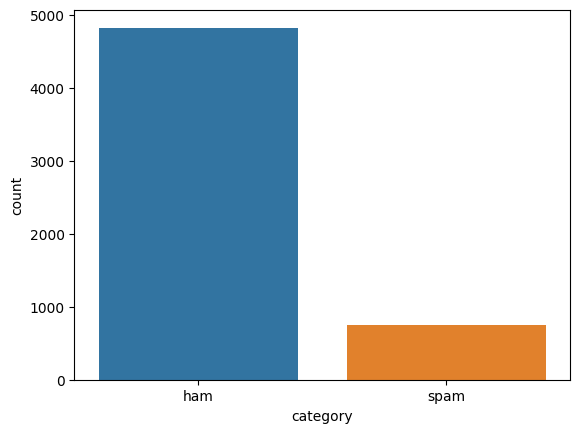

In [8]:
sns.countplot(x=df['category'])

## Removing HTML Tags :

In [9]:
def remove_html(text):
  bs=BeautifulSoup(text,'html.parser')
  return bs.get_text()
df['mails']=df['mails'].apply(lambda text:remove_html(text))  
df

,category,mails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Dealing with the short words and converting into lower case :

In [10]:
d={'LOL': 'Laugh out loud',
'BRB': 'Be right back',
'OMG': 'Oh my God',
'TTYL': 'Talk to you later',
'BTW': 'By the way',
'SMH': 'Shaking my head',
'IMO': 'In my opinion',
'FYI': 'For your information',
'JK': 'Just kidding',
'ROFL': 'Rolling on the floor laughing',
'NP': 'No problem',
'TMI': 'Too much information',
'ASAP': 'As soon as possible',
'GTG': 'Got to go',
'IMO': 'In my opinion',
'AFK': 'Away from keyboard',
'NVM': 'Never mind',
'OP' : 'Over power',
'ILU': 'I love you',
'BC' : 'Because',
'DM' : 'Direct message',
'FTW': 'For the win',
'IDK': "I don't know",
'IRL': 'In real life',
'LMK': 'Let me know',
'NBD': 'No big deal',
'SU' : 'Shut up',
'THX': 'Thanks',
'ST' : 'Stop talking',
'YOLO':'You only live once',
'WTH' :'What the hack',
'GL' : 'Good luck',
'BOL':'Best of luck',
'OMW': 'On my way',
'IDC': "I don't care",
'TBH': 'To be honest',
'IWB': 'I will be back',
'OTW': 'On the way',
'U'  : 'You',
'WKLY':'Weekly',
'COMP':'Competition',
'R'  : 'Are',
"I'M": 'I am'}

In [11]:
def stort_word3(text):
  T=text.upper()
  t1=nltk.word_tokenize(T)
  for u in t1:
    if u in d:
      e=t1.index(u)
      t1[e]=d[u]
  t1  
  T=' '.join(word for word in t1)  
  return T.lower()
df['mails']=df['mails'].apply(lambda x:stort_word3(x))  
df

,category,mails
0,ham,"go until jurong point , crazy .. available onl..."
1,ham,ok lar ... joking wif you oni ...
2,spam,free entry in 2 a weekly competition to win fa...
3,ham,you dun say so early hor ... you c already the...
4,ham,"nah i do n't think he goes to usf , he lives a..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì_ b going to esplanade fr home ?
5569,ham,"pity , * was in mood for that . so ... any oth..."
5570,ham,the guy did some bitching but i acted like i '...


## Removing Stop Words :

In [12]:
stop=stopwords.words('english')
def remove_stop(text):
  return ' '.join([word for word in text.split() if word not in stop])
df['mails']=df['mails'].apply(lambda text:remove_stop(text))  
df

,category,mails
0,ham,"go jurong point , crazy .. available bugis n g..."
1,ham,ok lar ... joking wif oni ...
2,spam,free entry 2 weekly competition win fa cup fin...
3,ham,dun say early hor ... c already say ...
4,ham,"nah n't think goes usf , lives around though"
...,...,...
5567,spam,2nd time tried 2 contact u. å£750 pound prize ...
5568,ham,ì_ b going esplanade fr home ?
5569,ham,"pity , * mood . ... suggestions ?"
5570,ham,guy bitching acted like 'd interested buying s...


## Removing Punctuation Marks :

In [14]:
from string import punctuation
punc=punctuation
my_punc=punc.replace("'",'')
def remove_punc(text):
  return text.translate(str.maketrans('','',my_punc))
df['mails']=df['mails'].apply(lambda text:remove_punc(text))  
df

,category,mails
0,ham,go jurong point crazy available bugis n grea...
1,ham,ok lar joking wif oni
2,spam,free entry 2 weekly competition win fa cup fin...
3,ham,dun say early hor c already say
4,ham,nah n't think goes usf lives around though
...,...,...
5567,spam,2nd time tried 2 contact u å£750 pound prize ...
5568,ham,ì b going esplanade fr home
5569,ham,pity mood suggestions
5570,ham,guy bitching acted like 'd interested buying s...


## Removing Special Characters :

In [15]:
def remove_spec(text):
  text=re.sub('http\s+\s',' ',text)
  text=re.sub('#\s+',' ',text)
  text=re.sub('@\s+',' ',text)
  text=re.sub(r'[^\x00-\x7f]', ' ',text)
  text=re.sub('\s+',' ',text)
  return text
df['mails']=df['mails'].apply(lambda x:remove_spec(x))  
df

,category,mails
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif oni
2,spam,free entry 2 weekly competition win fa cup fin...
3,ham,dun say early hor c already say
4,ham,nah n't think goes usf lives around though
...,...,...
5567,spam,2nd time tried 2 contact u 750 pound prize 2 c...
5568,ham,b going esplanade fr home
5569,ham,pity mood suggestions
5570,ham,guy bitching acted like 'd interested buying s...


## Stemming Process :

In [16]:
df2=df.copy()

In [17]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
df2['mails']=df2['mails'].apply(lambda x:' '.join(ps.stem(word)for word in x.split()))
df2

,category,mails
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif oni
2,spam,free entri 2 weekli competit win fa cup final ...
3,ham,dun say earli hor c alreadi say
4,ham,nah n't think goe usf live around though
...,...,...
5567,spam,2nd time tri 2 contact u 750 pound prize 2 cla...
5568,ham,b go esplanad fr home
5569,ham,piti mood suggest
5570,ham,guy bitch act like 'd interest buy someth els ...


## Most Frequent Words(Spam Mails) :

In [18]:
from collections import Counter
coun=Counter()
spam_df=df[df['category']=='spam']
ham_df=df[df['category']=='ham']
for text in spam_df['mails'].values:
  for word in text.split():
    coun[word]+=1
f=coun.most_common(150)    
print(f)


[('call', 347), ('free', 219), ('2', 176), ('txt', 156), ('ur', 144), ('mobile', 123), ('4', 123), ('text', 121), ('stop', 118), ('claim', 113), ('reply', 104), ('prize', 92), ('get', 84), ("'s", 72), ('new', 69), ('send', 68), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 54), ('c', 53), ('week', 53), ('guaranteed', 50), ('customer', 49), ('16', 49), ('tone', 48), ('per', 46), ('500', 45), ('phone', 45), ('150', 43), ('1000', 43), ('18', 43), ('chat', 43), ('cs', 41), ('1', 39), ('draw', 39), ('weekly', 38), ('100', 38), ('awarded', 38), ('2000', 37), ('latest', 36), ('mins', 35), ('line', 35), ('150ppm', 34), ('receive', 33), ('camera', 33), ('message', 33), ('every', 33), ('holiday', 32), ('landline', 32), ('shows', 31), ('go', 31), ('3', 30), ('cost', 30), ('ringtone', 30), ('want', 30), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('msg', 29), ('live', 29), ('150p', 29), ('video', 29), ('po', 29), ('award', 28),

## Most Frequent Words(Ham Mails) :

In [19]:
coun1=Counter()
for text1 in ham_df['mails'].values:
  for word1 in text.split():
    coun1[word1]+=1
f1=coun1.most_common(150)    
print(f1)

[('2', 9650), ('2nd', 4825), ('time', 4825), ('tried', 4825), ('contact', 4825), ('u', 4825), ('750', 4825), ('pound', 4825), ('prize', 4825), ('claim', 4825), ('easy', 4825), ('call', 4825), ('087187272008', 4825), ('now1', 4825), ('10p', 4825), ('per', 4825), ('minute', 4825), ('btnationalrate', 4825)]


## Word Cloud :

In [20]:
from wordcloud import WordCloud
spam_wc=' '.join([words for words in spam_df['mails']])
ham_wc=' '.join([word_ham for word_ham in ham_df['mails']])
wc=WordCloud(width=1200,height=700,max_words=150)
wc1=WordCloud(width=1200,height=700,max_words=150)
word1=wc.generate(spam_wc)
word2=wc1.generate(ham_wc)

## Word Cloud Of Spam Mails :

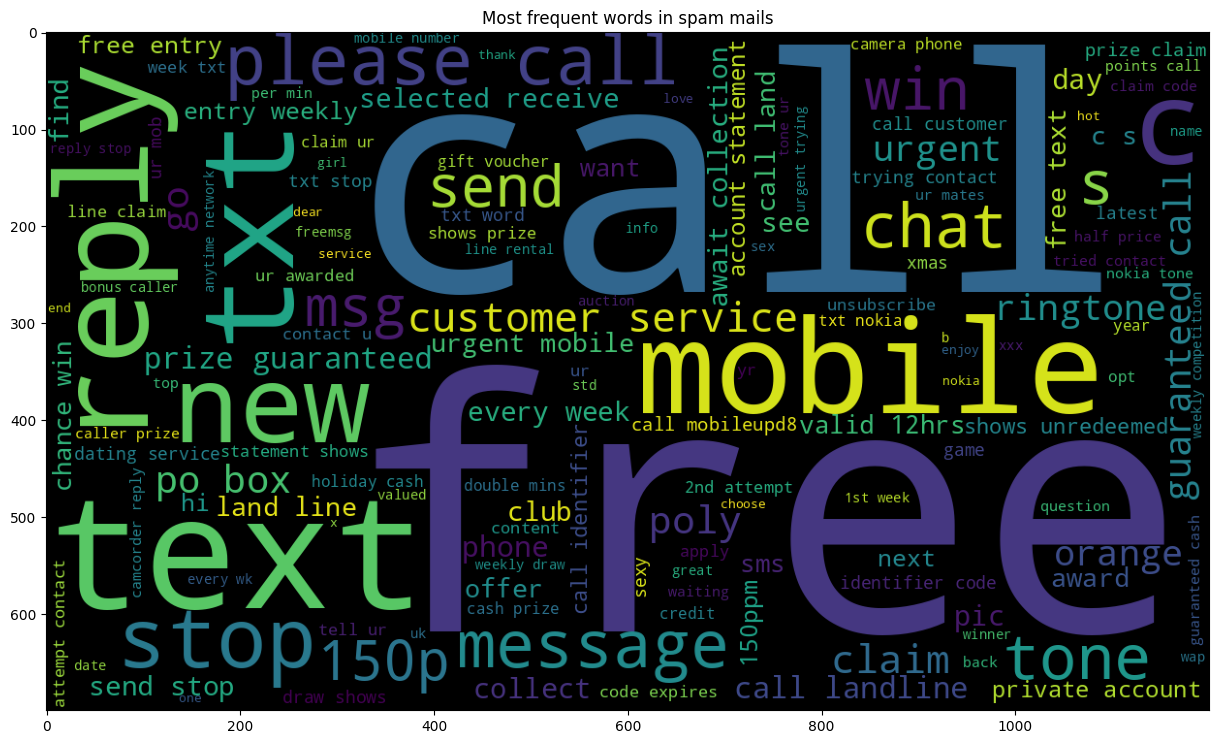

In [21]:
plt.figure(figsize=(15,10))
plt.imshow(word1,cmap='Accent_r')
plt.title('Most frequent words in spam mails')
plt.show()

## Word Cloud Of Ham Mails :

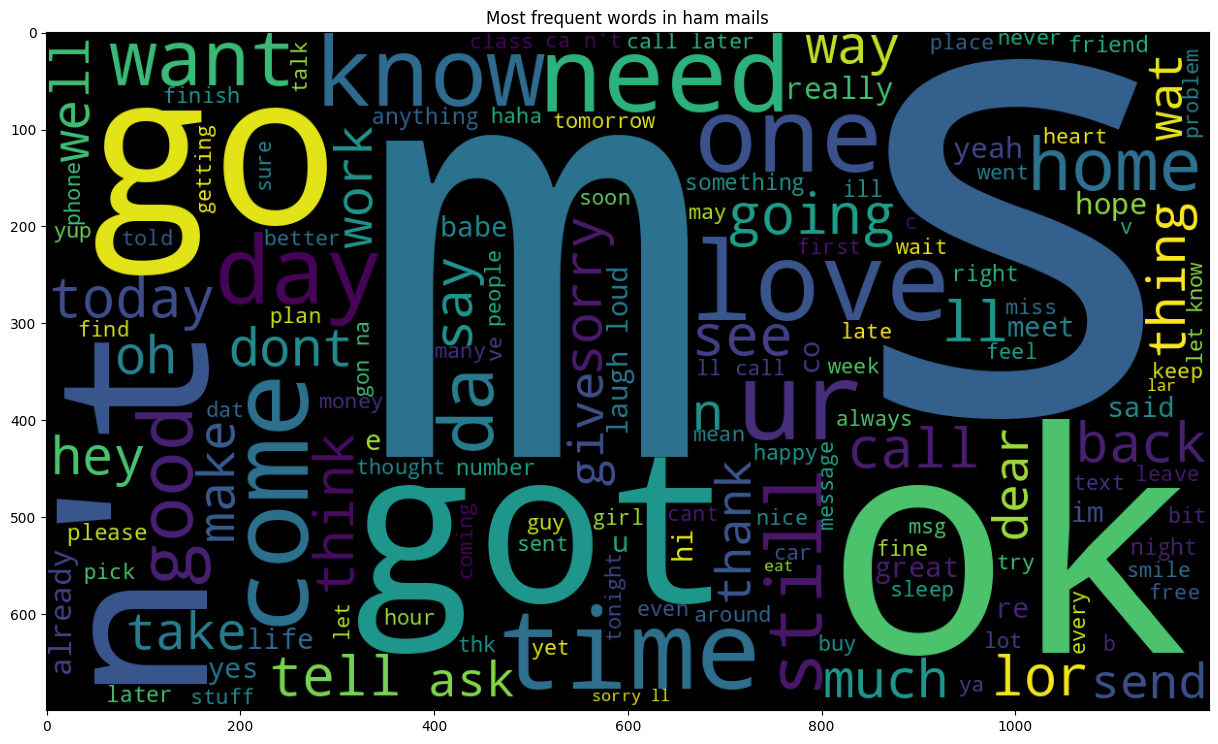

In [22]:
plt.figure(figsize=(15,10))
plt.imshow(word2)
plt.title('Most frequent words in ham mails')
plt.show()

## Word Cloud After Stemming :

In [23]:
stem_spam_df=df2[df2['category']=='spam']
stem_ham_df=df2[df2['category']=='ham']
stem_spam=' '.join([word2 for word2 in stem_spam_df['mails']])
stem_ham=' '.join([word3 for word3 in stem_ham_df['mails']])
wc2=WordCloud(width=1200,height=700,max_words=150)
wc3=WordCloud(width=1200,height=700,max_words=150)
stem_spam1=wc2.generate(stem_spam)
stem_ham1=wc3.generate(stem_ham)


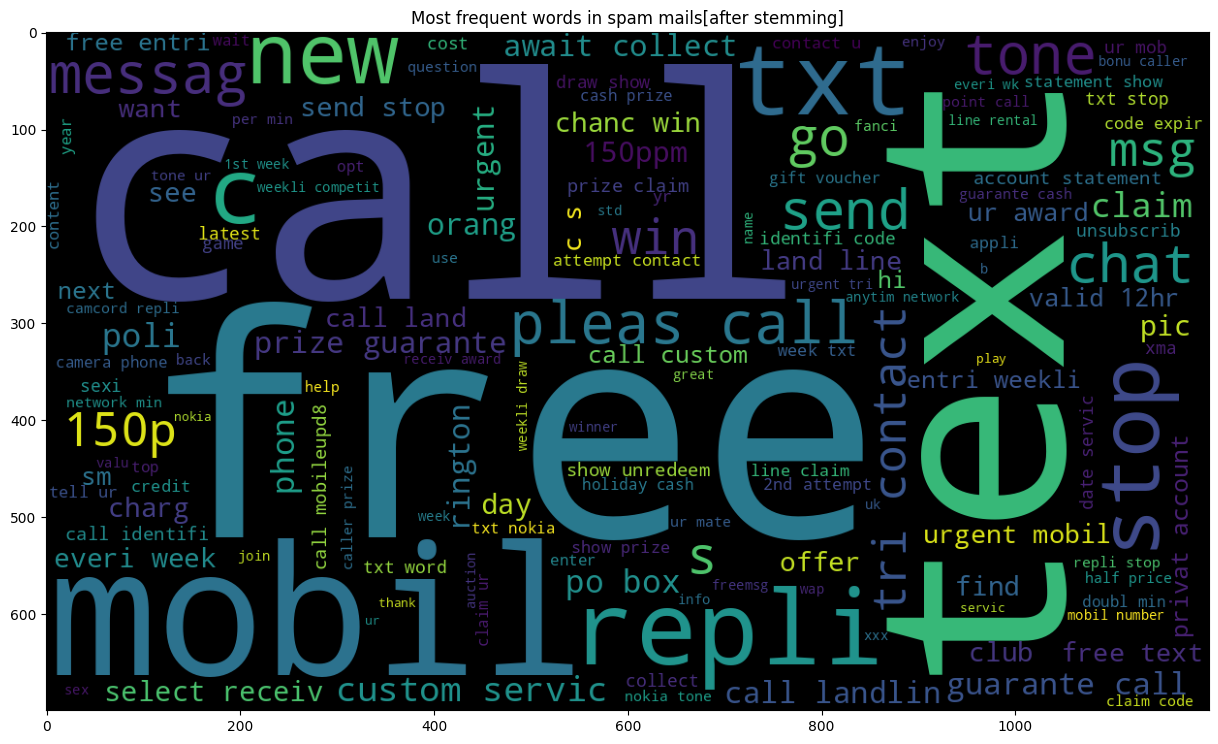

In [24]:
plt.figure(figsize=(15,10))
plt.imshow(stem_spam1,cmap='Accent_r')
plt.title('Most frequent words in spam mails[after stemming]')
plt.show()

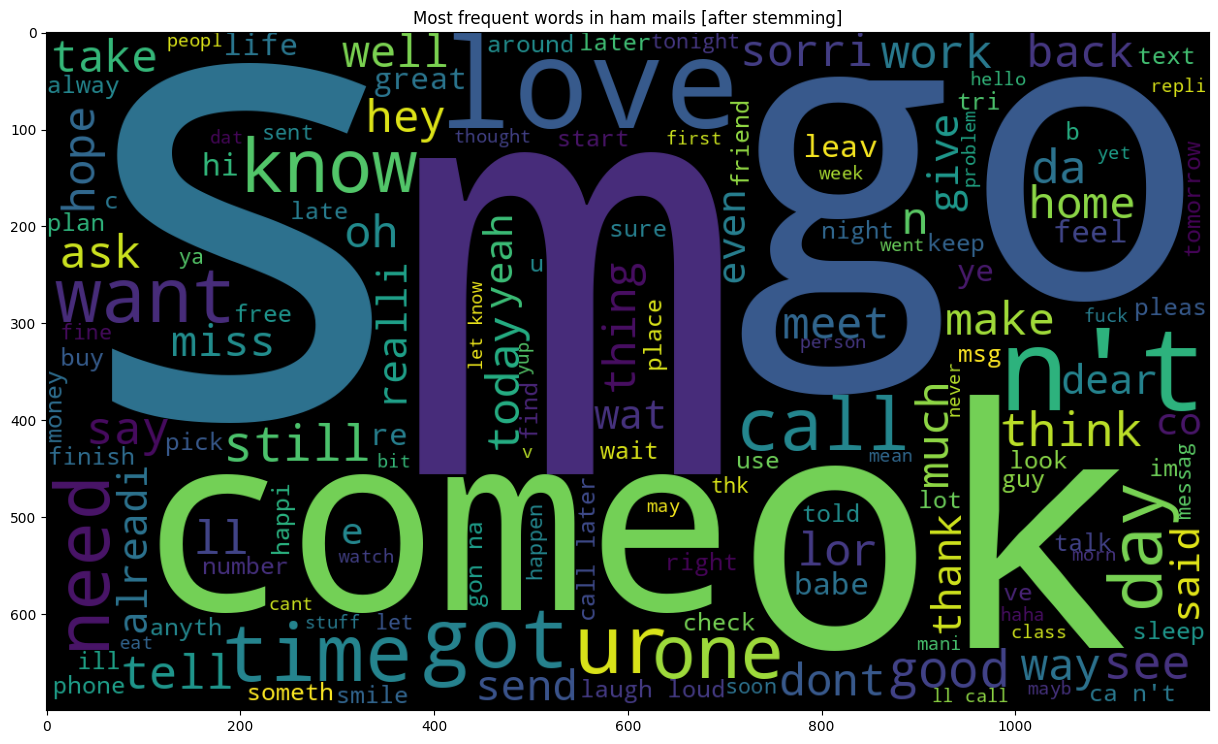

In [25]:
plt.figure(figsize=(15,10))
plt.imshow(stem_ham1)
plt.title('Most frequent words in ham mails [after stemming]')
plt.show()

## Converting Categorical Into Numerical :

In [26]:
from sklearn.preprocessing import LabelEncoder
lab1=LabelEncoder()
df['category']=lab1.fit_transform(df['category'])
df

,category,mails
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif oni
2,1,free entry 2 weekly competition win fa cup fin...
3,0,dun say early hor c already say
4,0,nah n't think goes usf lives around though
...,...,...
5567,1,2nd time tried 2 contact u 750 pound prize 2 c...
5568,0,b going esplanade fr home
5569,0,pity mood suggestions
5570,0,guy bitching acted like 'd interested buying s...


## Text Vectorization :

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
df3=df.copy()
tfid=TfidfVectorizer(max_features=1500)
count=CountVectorizer(ngram_range=(1,3))
tfid.fit(df['mails'])
count.fit(df3['mails'])
feat=tfid.transform(df['mails'])
Y=df['category']
feat1=count.transform(df3['mails'])
Y1=df3['category']

# Train Test Split :

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feat, Y, train_size=0.85, random_state=1)
x_train1,x_test1,y_train1,y_test1=train_test_split(feat1, Y1, train_size=0.85, random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4736, 1500), (836, 1500), (4736,), (836,))

## Best Data For Model :

In [29]:
def checking(x_train,y_train,x_test,y_test,random_state):
  from sklearn.linear_model import LogisticRegression
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.svm import SVC
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.naive_bayes import MultinomialNB
  c_log=LogisticRegression()
  c_dis=DecisionTreeClassifier(random_state=random_state)
  c_ran=RandomForestClassifier(n_estimators=90,random_state=random_state)
  c_svm=SVC()
  c_knn=KNeighborsClassifier()
  c_nb=MultinomialNB()
  acc2=[]
  list2=[c_log,c_dis,c_ran,c_svm,c_knn,c_nb]
  for i in list2:
    i.fit(x_train,y_train)
    acc2.append(i.score(x_test,y_test))
  return sum(acc2)/len(acc2)  



## N Grams :

In [30]:
con=checking(x_train=x_train1,y_train=y_train1,x_test=x_test1,y_test=y_test1,random_state=1)
con

0.9649122807017544

## Tfidf :

In [31]:
tfidf=checking(x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test,random_state=1)
tfidf

0.9722886762360448

# Logistic Regression :

In [32]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)
y_pre=log.predict(x_test)

In [33]:
log.score(x_test,y_test)

0.9784688995215312

In [34]:
log.score(x_train,y_train)

0.9719172297297297

## Performing Metrics :

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report,roc_curve

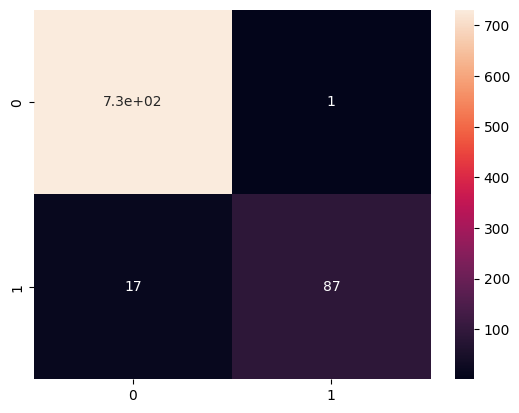

In [36]:
sns.heatmap(confusion_matrix(y_test,y_pre),annot=True)
plt.show()

In [37]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       732
           1       0.99      0.84      0.91       104

    accuracy                           0.98       836
   macro avg       0.98      0.92      0.95       836
weighted avg       0.98      0.98      0.98       836



## Wrong Predictions :

In [38]:
df_log=pd.DataFrame({'Actual':y_test,'Predicted':y_pre})
w=len(df_log.loc[df_log['Actual'] != df_log['Predicted']])
w

18

# Decision Tree Classifier :

In [39]:
from sklearn.tree import DecisionTreeClassifier
dis=DecisionTreeClassifier(random_state=1)
dis.fit(x_train,y_train)
y_pre_dis=dis.predict(x_test)

In [40]:
dis.score(x_test,y_test)

0.9533492822966507

In [41]:
dis.score(x_train,y_train)

0.9995777027027027

## Performing Metrics :

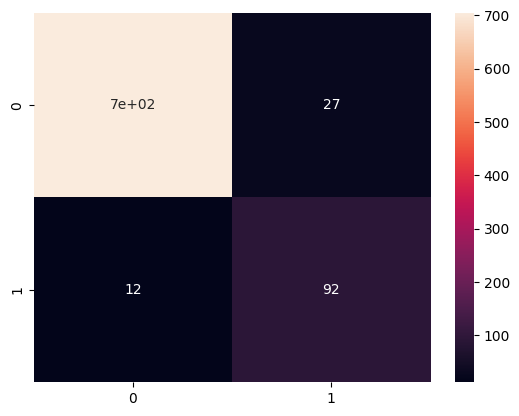

In [42]:
sns.heatmap(confusion_matrix(y_test,y_pre_dis),annot=True)
plt.show()

In [43]:
print(classification_report(y_test,y_pre_dis))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       732
           1       0.77      0.88      0.83       104

    accuracy                           0.95       836
   macro avg       0.88      0.92      0.90       836
weighted avg       0.96      0.95      0.95       836



## Wrong Predictions :

In [44]:
df_dis=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_dis})
w1=len(df_dis.loc[df_dis['Actual'] != df_dis['Predicted']])
w1

39

# Random Forest Classifier :

In [45]:
from sklearn.ensemble import RandomForestClassifier
list1=[45,50,55,60,65,70,75,80,85,90,95,100,110,120,200]
for r in list1:
  ran1=RandomForestClassifier(n_estimators=r,random_state=0)
  ran1.fit(x_train,y_train)
  print('when n_estimators = ',r,' accuracy is = '+str(ran1.score(x_test,y_test)))
  print()

when n_estimators =  45  accuracy is = 0.9880382775119617

when n_estimators =  50  accuracy is = 0.9880382775119617

when n_estimators =  55  accuracy is = 0.9892344497607656

when n_estimators =  60  accuracy is = 0.9880382775119617

when n_estimators =  65  accuracy is = 0.9892344497607656

when n_estimators =  70  accuracy is = 0.9892344497607656

when n_estimators =  75  accuracy is = 0.9880382775119617

when n_estimators =  80  accuracy is = 0.9892344497607656

when n_estimators =  85  accuracy is = 0.9892344497607656

when n_estimators =  90  accuracy is = 0.9904306220095693

when n_estimators =  95  accuracy is = 0.9904306220095693

when n_estimators =  100  accuracy is = 0.9904306220095693

when n_estimators =  110  accuracy is = 0.9904306220095693

when n_estimators =  120  accuracy is = 0.9892344497607656

when n_estimators =  200  accuracy is = 0.9892344497607656



In [46]:
ran=RandomForestClassifier(n_estimators=90,random_state=0)
ran.fit(x_train,y_train)
y_pre_ran=ran.predict(x_test)

In [47]:
ran.score(x_test,y_test)

0.9904306220095693

In [48]:
ran.score(x_train,y_train)

0.9995777027027027

## Performing Metrics :

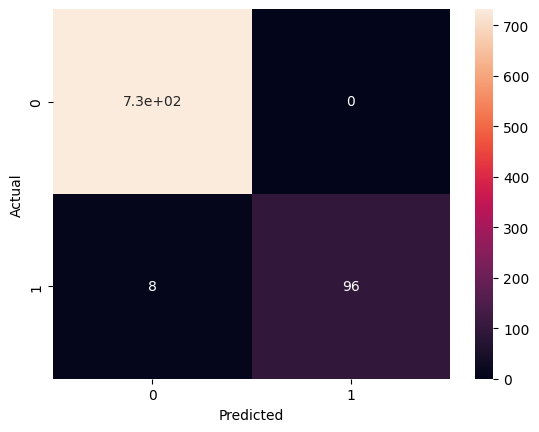

In [49]:
sns.heatmap(confusion_matrix(y_test,y_pre_ran),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [50]:
print(classification_report(y_test,y_pre_ran))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       732
           1       1.00      0.92      0.96       104

    accuracy                           0.99       836
   macro avg       0.99      0.96      0.98       836
weighted avg       0.99      0.99      0.99       836



## Wrong Predictions :

In [51]:
df_ran=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_ran})
w2=len(df_ran.loc[df_ran['Actual'] != df_ran['Predicted']])
w2

8

# SVM :

In [52]:
from sklearn.svm import SVC
kernel=['rbf','poly','linear','sigmoid']
for k in kernel:
  svc=SVC(kernel=k)
  svc.fit(x_train,y_train)
  y_pre_svm=svc.predict(x_test)
  df_svm=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_svm})
  w3=len(df_svm.loc[df_svm['Actual'] != df_svm['Predicted']])
  print('for the kernel = ',k,' the testing accuracy is = '+str(svc.score(x_test,y_test)))
  print('for the kernel = ',k,' the training accuracy is = '+str(svc.score(x_train,y_train)))
  print(classification_report(y_test,y_pre_svm))
  print('total wrong prediction are = '+str(w3))
  print()


for the kernel =  rbf  the testing accuracy is = 0.9904306220095693
for the kernel =  rbf  the training accuracy is = 0.995143581081081
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       732
           1       1.00      0.92      0.96       104

    accuracy                           0.99       836
   macro avg       0.99      0.96      0.98       836
weighted avg       0.99      0.99      0.99       836

total wrong prediction are = 8

for the kernel =  poly  the testing accuracy is = 0.972488038277512
for the kernel =  poly  the training accuracy is = 0.9993665540540541
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       732
           1       1.00      0.78      0.88       104

    accuracy                           0.97       836
   macro avg       0.98      0.89      0.93       836
weighted avg       0.97      0.97      0.97       836

total wrong prediction are = 23

for the

In [53]:
lin=SVC(kernel='linear')
lin.fit(x_train,y_train)
y_pre_lin=lin.predict(x_test)

In [54]:
lin.score(x_test,y_test)

0.9916267942583732

In [55]:
lin.score(x_train,y_train)

0.9890202702702703

## Performing Metrics :

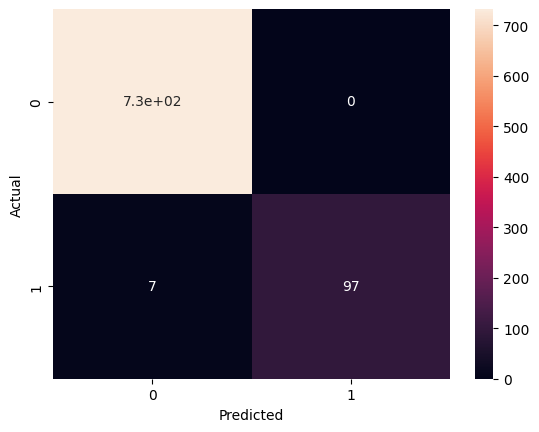

In [56]:
sns.heatmap(confusion_matrix(y_test,y_pre_lin),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [57]:
print(classification_report(y_test,y_pre_lin))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       732
           1       1.00      0.93      0.97       104

    accuracy                           0.99       836
   macro avg       1.00      0.97      0.98       836
weighted avg       0.99      0.99      0.99       836



## Wrong Predictions :

In [58]:
df_lin=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_lin})
w3=len(df_lin.loc[df_lin['Actual'] != df_lin['Predicted']])
w3

7

# KNeighbors Classifier (KNN) :

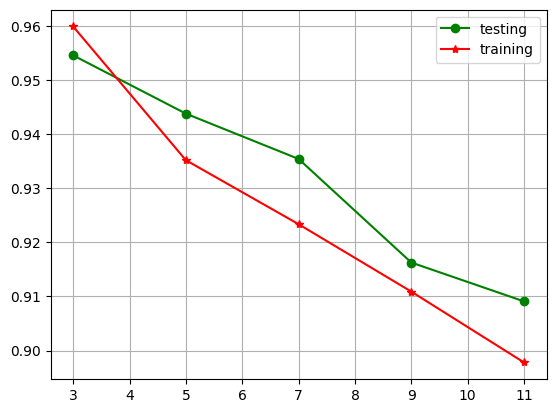

In [59]:
from sklearn.neighbors import KNeighborsClassifier
accuracy=[]
acc_train=[]
for i in range(3,13,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  accuracy.append(knn.score(x_test,y_test))
  acc_train.append(knn.score(x_train,y_train))
plt.plot([w for w in range(3,13,2)],accuracy,color='green',marker='o',
         label='testing')
plt.plot([t for t in range(3,13,2)],acc_train,color='red',marker='*',
         label='training')
plt.grid()
plt.legend()
plt.show()

In [60]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pre_knn=knn.predict(x_test)

In [61]:
knn.score(x_test,y_test)

0.9545454545454546

In [62]:
knn.score(x_train,y_train)

0.9598817567567568

## Performing Metrics :

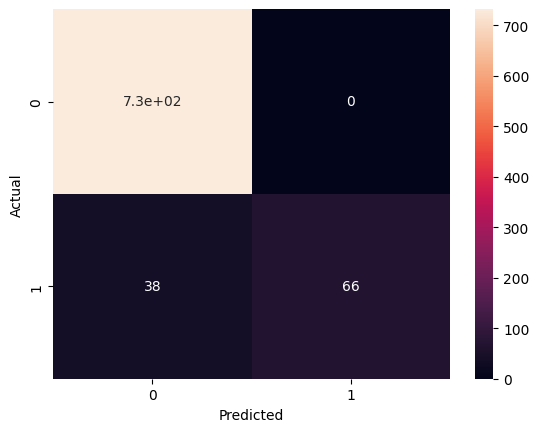

In [63]:
sns.heatmap(confusion_matrix(y_test,y_pre_knn),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [64]:
print(classification_report(y_test,y_pre_knn))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       732
           1       1.00      0.63      0.78       104

    accuracy                           0.95       836
   macro avg       0.98      0.82      0.88       836
weighted avg       0.96      0.95      0.95       836



## Wrong Predictions :

In [65]:
df_knn=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_knn})
w4=len(df_knn.loc[df_knn['Actual'] != df_knn['Predicted']])
w4

38

# Naive Bayes :

In [66]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
y_pre_nb=nb.predict(x_test)

In [67]:
nb.score(x_test,y_test)

0.9832535885167464

In [68]:
nb.score(x_train,y_train)

0.9809966216216216

## Performing Metrics :

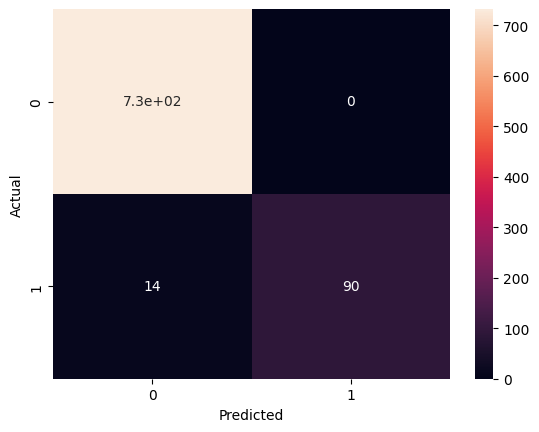

In [69]:
sns.heatmap(confusion_matrix(y_test,y_pre_nb),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [70]:
print(classification_report(y_test,y_pre_knn))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       732
           1       1.00      0.63      0.78       104

    accuracy                           0.95       836
   macro avg       0.98      0.82      0.88       836
weighted avg       0.96      0.95      0.95       836



## Wrong Predictions :

In [71]:
df_nb=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_nb})
w5=len(df_nb.loc[df_nb['Actual'] != df_nb['Predicted']])
w5

14

# Ensemble Technic :
## Voting Classifier :

In [72]:
from sklearn.ensemble import VotingClassifier
ran2=RandomForestClassifier(n_estimators=100,random_state=0)
rbf=SVC(kernel='rbf')
pre1=[('ran',ran),('ran2',ran2),('lin',lin)]
per2=[('ran',ran),('lin',lin)]
per3=[('ran',ran),('ran2',ran2),('lin',lin),('rbf',rbf)]
lis_pre=[pre1,per2,per3]
for p in lis_pre:
  vot1=VotingClassifier(estimators=p)
  vot1.fit(x_train,y_train)
  print('for ',p,' The accuracy is = '+str(vot1.score(x_test,y_test)))
  print()

for  [('ran', RandomForestClassifier(n_estimators=90, random_state=0)), ('ran2', RandomForestClassifier(random_state=0)), ('lin', SVC(kernel='linear'))]  The accuracy is = 0.9904306220095693

for  [('ran', RandomForestClassifier(n_estimators=90, random_state=0)), ('lin', SVC(kernel='linear'))]  The accuracy is = 0.9892344497607656

for  [('ran', RandomForestClassifier(n_estimators=90, random_state=0)), ('ran2', RandomForestClassifier(random_state=0)), ('lin', SVC(kernel='linear')), ('rbf', SVC())]  The accuracy is = 0.9904306220095693



In [73]:
vot=VotingClassifier(estimators=per3)
vot.fit(x_train,y_train)
y_pre_vot=vot.predict(x_test)

In [74]:
vot.score(x_test,y_test)

0.9904306220095693

In [75]:
vot.score(x_train,y_train)

0.995143581081081

## Performing Metrics :

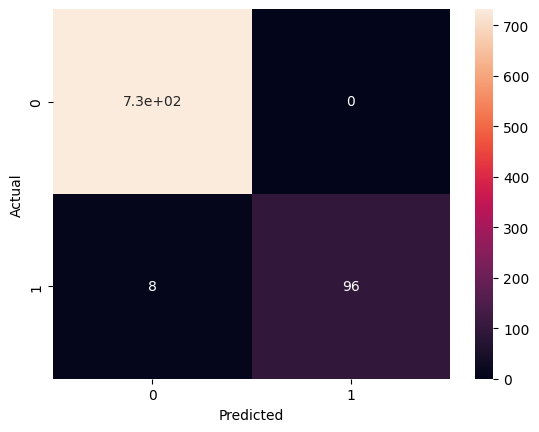

In [76]:
sns.heatmap(confusion_matrix(y_test,y_pre_vot),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [77]:
print(classification_report(y_test,y_pre_vot))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       732
           1       1.00      0.92      0.96       104

    accuracy                           0.99       836
   macro avg       0.99      0.96      0.98       836
weighted avg       0.99      0.99      0.99       836



## Wrong Predictions :

In [78]:
df_vot=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_vot})
w6=len(df_vot.loc[df_vot['Actual'] != df_vot['Predicted']])
w6

8

# Bagging Classifier :

In [79]:
from sklearn.ensemble import BaggingClassifier
sample=[0.5,0.6,0.7,0.8,0.9,1.0]
for e in range(10,50,10):
  for s in sample:
    bag1=BaggingClassifier(estimator=lin,max_samples=s,n_estimators=e)
    bag1.fit(x_train,y_train)
    print('For max_sample={},n_estimators={}'.format(s,e),' Accuracy score is = '+str(bag1.score(x_test,y_test)))
    print()

For max_sample=0.5,n_estimators=10  Accuracy score is = 0.9844497607655502

For max_sample=0.6,n_estimators=10  Accuracy score is = 0.9880382775119617

For max_sample=0.7,n_estimators=10  Accuracy score is = 0.9856459330143541

For max_sample=0.8,n_estimators=10  Accuracy score is = 0.9868421052631579

For max_sample=0.9,n_estimators=10  Accuracy score is = 0.9880382775119617

For max_sample=1.0,n_estimators=10  Accuracy score is = 0.9892344497607656

For max_sample=0.5,n_estimators=20  Accuracy score is = 0.9868421052631579

For max_sample=0.6,n_estimators=20  Accuracy score is = 0.9892344497607656

For max_sample=0.7,n_estimators=20  Accuracy score is = 0.9892344497607656

For max_sample=0.8,n_estimators=20  Accuracy score is = 0.9892344497607656

For max_sample=0.9,n_estimators=20  Accuracy score is = 0.9892344497607656

For max_sample=1.0,n_estimators=20  Accuracy score is = 0.9892344497607656

For max_sample=0.5,n_estimators=30  Accuracy score is = 0.9868421052631579

For max_samp

In [80]:
bag=BaggingClassifier(estimator=lin,max_samples=1.0,n_estimators=40)
bag.fit(x_train,y_train)
y_pre_bag=bag.predict(x_test)

In [81]:
bag.score(x_test,y_test)

0.9892344497607656

In [82]:
bag.score(x_train,y_train)

0.988597972972973

## Performing Metrics :

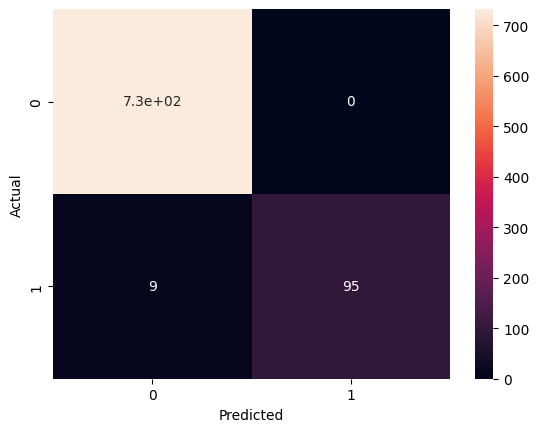

In [83]:
sns.heatmap(confusion_matrix(y_test,y_pre_bag),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [84]:
print(classification_report(y_test,y_pre_vot))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       732
           1       1.00      0.92      0.96       104

    accuracy                           0.99       836
   macro avg       0.99      0.96      0.98       836
weighted avg       0.99      0.99      0.99       836



## Wrong Predictions :

In [85]:
df_bag=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_bag})
w7=len(df_bag.loc[df_bag['Actual'] != df_bag['Predicted']])
w7

9

# Boosting Technic :

In [86]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xg
from xgboost import XGBClassifier

In [88]:
ada=AdaBoostClassifier(estimator=ran)
gr=GradientBoostingClassifier()
xg=XGBClassifier()
boost_list=[ada,gr]
for i1 in boost_list:
  i1.fit(x_train,y_train)
  print('Model = ',i1,' Accuracy is = '+str(i1.score(x_test,y_test)))
  print()

Model =  AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=90,
                                                    random_state=0))  Accuracy is = 0.9844497607655502

Model =  GradientBoostingClassifier()  Accuracy is = 0.9605263157894737



In [89]:
xg1=XGBClassifier()
xg1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [90]:
xg1.score(x_test,y_test)

0.972488038277512

In [91]:
xg1.score(x_train,y_train)

0.989231418918919

# ROC Curve :

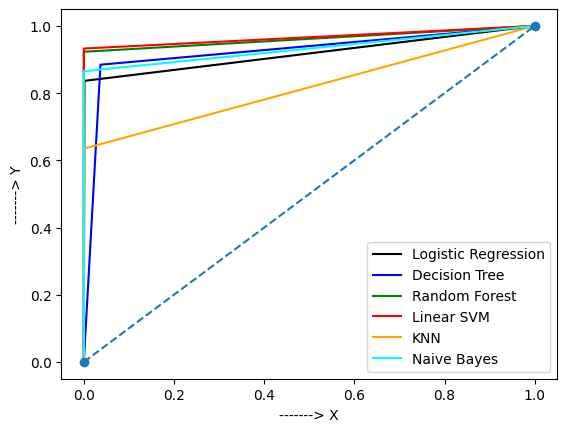

In [92]:
t_log,f_log,th_log=roc_curve(y_test,y_pre)
t_dis,f_dis,th_dis=roc_curve(y_test,y_pre_dis)
t_ran,f_ran,th_ran=roc_curve(y_test,y_pre_ran)
t_lin,f_lin,th_lin=roc_curve(y_test,y_pre_lin)
t_knn,f_knn,th_knn=roc_curve(y_test,y_pre_knn)
t_nb,f_nb,th_nb=roc_curve(y_test,y_pre_nb)
plt.plot(t_log,f_log,color='black',label='Logistic Regression')
plt.plot(t_dis,f_dis,color='blue',label='Decision Tree')
plt.plot(t_ran,f_ran,color='green',label='Random Forest')
plt.plot(t_lin,f_lin,color='red',label='Linear SVM')
plt.plot(t_knn,f_knn,color='orange',label='KNN')
plt.plot(t_nb,f_nb,color='cyan',label='Naive Bayes')
plt.plot([0, 1], 'o--', marker='o')
plt.xlabel('-------> X')
plt.ylabel('-------> Y')
plt.legend()
plt.show()

# Model Accuracy :

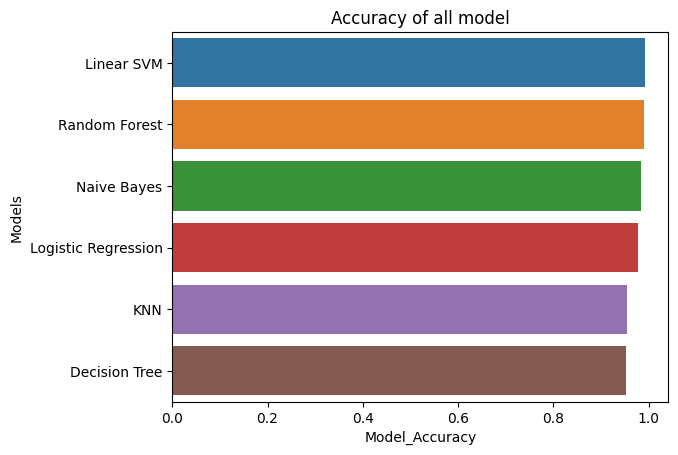

In [93]:
acc_df=pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest','Linear SVM','KNN','Naive Bayes'],
                     'Accuracy':[log.score(x_test,y_test),dis.score(x_test,y_test),ran.score(x_test,y_test),lin.score(x_test,y_test),
                                 knn.score(x_test,y_test),nb.score(x_test,y_test)]})
df_dd=acc_df.sort_values('Accuracy',ascending=False)
sns.barplot(data=df_dd, x='Accuracy', y='Model')
plt.xlabel('Model_Accuracy')
plt.ylabel('Models')
plt.title('Accuracy of all model')
plt.show()

# Model Wrong Pedictions :

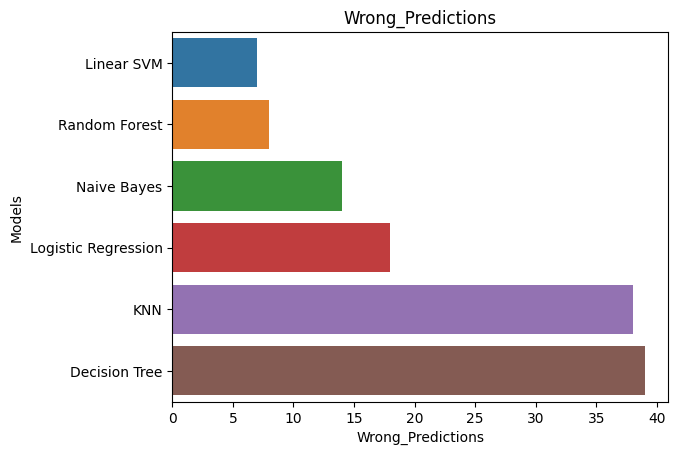

In [94]:
w_df=pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest','Linear SVM','KNN','Naive Bayes'],
                   'Wrong_Predictions':[w,w1,w2,w3,w4,w5]})
w_dff=w_df.sort_values('Wrong_Predictions')
sns.barplot(data=w_dff, x='Wrong_Predictions', y='Model')
plt.xlabel('Wrong_Predictions')
plt.ylabel('Models')
plt.title('Wrong_Predictions')
plt.show()